# Coderush Group Project 
## By: Group 4
### Team Members
- Anish Shilpakar
- Shyamron Dongol
- Shivajit Pandit Chhetri
- Amit Duwal

> This Notebook contains necessary code for data cleaning and visualization of the scraped data from Amazon.com  

P.S: We have scraped data for **laptops** from Amazon.com


## Resets

Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Necessary imports for data cleaning and visualization

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import re 
import os

To display the pandas table full width and height

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Loading Section

Loading the scraped data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/laptop_data.csv')
print(f"Original Data has shape: {df.shape}")
df.head()

Original Data has shape: (2843, 17)


,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Series,Color,Resolution,Weight,USB,Battery,Graphics,Disk_size,Card_desc,Price
0,Microsoft Surface Laptop Intel Core i5 7th Gen...,Microsoft,13.5 Inches,1.2GHz Cortex A8 Processor,8 GB,Windows 10,4.4,Intel,Platinum,NaN,NaN,NaN,NaN,Intel HD Graphics 620,256 GB,Integrated,NaN
1,"Microsoft Surface Laptop 3 13.5"" Touch-Screen ...",Microsoft,13.5 Inches,Core i5,8 GB,Windows 10,4.4,Microsoft Surface,Matte Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Microsoft Surface Laptop (Intel Core i7, 16GB ...",Microsoft,13.5 Inches,Core i7,16 GB,Windows 10 S,3.9,Surface Laptop,Platinum,NaN,NaN,NaN,NaN,Intel Iris Plus Graphics 640,512 GB,Integrated,NaN
3,"Microsoft Surface Laptop 3, 10th Gen Intel Cor...",Microsoft,13 Inches,Core i5-1035G7,8 GB,Windows 10 Home,4.2,Surface Laptop 3,Cobalt Blue,NaN,NaN,NaN,NaN,Intel Iris Plus,NaN,Integrated,NaN
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4 Inches,Core i5,4 GB,Windows 11 Pro,3.9,Surface Laptop Go,Silver,NaN,NaN,NaN,NaN,NaN,256 GB,Integrated,$359.99


In [ ]:
len(df['Series'].unique())D

1309

Selecting only the required columns suitable for visualization
- Title
- Price
- Rating
- Brand
- Screen Size
- CPU_Model
- Ram
- Graphics
- Disk_size

In [ ]:
used_cols = ['Title','Brand','Screen_Size','CPU_Model','Ram','Rating','Graphics','Disk_size','Price']
df = df[used_cols]

In [ ]:
df.head()

,Title,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price
0,Microsoft Surface Laptop Intel Core i5 7th Gen...,Microsoft,13.5 Inches,1.2GHz Cortex A8 Processor,8 GB,4.4,Intel HD Graphics 620,256 GB,NaN
1,"Microsoft Surface Laptop 3 13.5"" Touch-Screen ...",Microsoft,13.5 Inches,Core i5,8 GB,4.4,NaN,NaN,NaN
2,"Microsoft Surface Laptop (Intel Core i7, 16GB ...",Microsoft,13.5 Inches,Core i7,16 GB,3.9,Intel Iris Plus Graphics 640,512 GB,NaN
3,"Microsoft Surface Laptop 3, 10th Gen Intel Cor...",Microsoft,13 Inches,Core i5-1035G7,8 GB,4.2,Intel Iris Plus,NaN,NaN
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4 Inches,Core i5,4 GB,3.9,NaN,256 GB,$359.99


## Data Cleaning Section

Checking for nan values in all columns

In [ ]:
df.isna().sum()

Title            0
Brand           33
Screen_Size     87
CPU_Model      212
Ram            132
Rating         560
Graphics       780
Disk_size      595
Price          980
dtype: int64

Dropping all the nan values from all the columns except rating column

In [ ]:
df = df.dropna(subset=['Price','Brand','Screen_Size','CPU_Model','Ram','Graphics','Disk_size'])
df.isna().sum()

Title            0
Brand            0
Screen_Size      0
CPU_Model        0
Ram              0
Rating         154
Graphics         0
Disk_size        0
Price            0
dtype: int64

Filling nan values in rating with 0

In [ ]:
df['Rating'].fillna(0,inplace=True)
df.isna().sum()

Title          0
Brand          0
Screen_Size    0
CPU_Model      0
Ram            0
Rating         0
Graphics       0
Disk_size      0
Price          0
dtype: int64

Here price is in form $818.0 so replacing it with suitable float value

In [ ]:
df.head()

,Title,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price
7,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6 Inches,Intel Core i5-1135G7,16 GB,4.3,Intel UHD Graphics,256 GB,$818.00
10,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,17.3 Inches,Core i7 8750H,16 GB,5.0,NVIDIA GeForce GTX 1070,1 TB,"$1,799.95"
11,EXCaliberPC 2022 MSI Pulse GL76 12UGK-256 (i7-...,EXCaliberPC,17.3 Inches,Intel Core i7,16 GB,4.1,NVIDIA GeForce RTX 3070,512 GB,"$1,699.00"
15,EXCaliberPC 2022 MSI Raider GE76 12UH-655 Pro ...,EXCaliberPC,17.3 Inches,Intel Core i9,64 GB,5.0,NVIDIA GeForce RTX 3080,3 TB,"$4,345.00"
17,EXCaliberPC 2022 ASUS ROG Strix Scar 15 G533ZM...,EXCaliberPC,15.6 Inches,Intel Core i9,16 GB,5.0,NVIDIA GeForce RTX 3060,512 GB,"$1,799.00"


In [ ]:
def clean_price(df2):
    df2 = df2.copy()
    df2['Price_dollar'] = [float(re.sub(r'[$,]','',price)) for price in df2['Price']]
    df2['Price_npr'] = [price*132.71 for price in df2['Price_dollar']]
    df2.drop(columns=['Price'],inplace=True)
    return df2

In [ ]:
df = clean_price(df)
df.head()

,Title,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price_dollar,Price_npr
7,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6 Inches,Intel Core i5-1135G7,16 GB,4.3,Intel UHD Graphics,256 GB,818.00,108556.7800
10,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,17.3 Inches,Core i7 8750H,16 GB,5.0,NVIDIA GeForce GTX 1070,1 TB,1799.95,238871.3645
11,EXCaliberPC 2022 MSI Pulse GL76 12UGK-256 (i7-...,EXCaliberPC,17.3 Inches,Intel Core i7,16 GB,4.1,NVIDIA GeForce RTX 3070,512 GB,1699.00,225474.2900
15,EXCaliberPC 2022 MSI Raider GE76 12UH-655 Pro ...,EXCaliberPC,17.3 Inches,Intel Core i9,64 GB,5.0,NVIDIA GeForce RTX 3080,3 TB,4345.00,576624.9500
17,EXCaliberPC 2022 ASUS ROG Strix Scar 15 G533ZM...,EXCaliberPC,15.6 Inches,Intel Core i9,16 GB,5.0,NVIDIA GeForce RTX 3060,512 GB,1799.00,238745.2900


Cleaining the column Ram and Disk_size, Here these columns are in form x GB, we only need the numeric value x for visualization, so need to replace these. Also there is value in form x TB so we first need to convert TB to GB

In [ ]:
df['Ram'].unique()

array(['16 GB', '64 GB', '32 GB', '4 GB', '8 GB', '128 GB', '20 GB',
       '24 GB', '12 GB', '6 GB', '2 GB', '1 TB', '40 GB'], dtype=object)

In [ ]:
df['Disk_size'].unique()

array(['256 GB', '1 TB', '512 GB', '3 TB', '4 TB', '320 GB', '2 TB',
       '32 GB', '1000 GB', '1000 TB', '64 GB', '128 GB', '64', '4 GB',
       '500 GB', '1 GB', '16 GB', '628 GB', '160 GB', '6 GB', '256',
       '6 TB', '512', '1512 GB', '1256 GB', '1024 GB', '1128 GB',
       '1.5 TB', '2000 GB', '0.01 GB', '80 GB', '384 GB', '65 GB'],
      dtype=object)

In [ ]:
def clean_ram_disk(df,clean_obj="Ram"):
    df2 = df.copy()
    GB_list = []
    for i in df2[clean_obj]:
        if 'GB' in i:
            GB_list.append((float(i.split(" ")[0])))
        elif 'TB' in i:
            GB_list.append((float(i.split(" ")[0]) * 1024))
        else:
            GB_list.append((i))
    df2[clean_obj] = GB_list 
    return df2

In [ ]:
df = clean_ram_disk(df,"Ram")
df = clean_ram_disk(df,"Disk_size")
df.head()

,Title,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price_dollar,Price_npr
7,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6 Inches,Intel Core i5-1135G7,16.0,4.3,Intel UHD Graphics,256.0,818.00,108556.7800
10,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,17.3 Inches,Core i7 8750H,16.0,5.0,NVIDIA GeForce GTX 1070,1024.0,1799.95,238871.3645
11,EXCaliberPC 2022 MSI Pulse GL76 12UGK-256 (i7-...,EXCaliberPC,17.3 Inches,Intel Core i7,16.0,4.1,NVIDIA GeForce RTX 3070,512.0,1699.00,225474.2900
15,EXCaliberPC 2022 MSI Raider GE76 12UH-655 Pro ...,EXCaliberPC,17.3 Inches,Intel Core i9,64.0,5.0,NVIDIA GeForce RTX 3080,3072.0,4345.00,576624.9500
17,EXCaliberPC 2022 ASUS ROG Strix Scar 15 G533ZM...,EXCaliberPC,15.6 Inches,Intel Core i9,16.0,5.0,NVIDIA GeForce RTX 3060,512.0,1799.00,238745.2900


In [ ]:
df.Ram.unique()

array([  16.,   64.,   32.,    4.,    8.,  128.,   20.,   24.,   12.,
          6.,    2., 1024.,   40.])

In [ ]:
df.Disk_size.unique()

array([256.0, 1024.0, 512.0, 3072.0, 4096.0, 320.0, 2048.0, 32.0, 1000.0,
       1024000.0, 64.0, 128.0, '64', 4.0, 500.0, 1.0, 16.0, 628.0, 160.0,
       6.0, '256', 6144.0, '512', 1512.0, 1256.0, 1128.0, 1536.0, 2000.0,
       0.01, 80.0, 384.0, 65.0], dtype=object)

Now cleaining the screen size

In [ ]:
df.Screen_Size.unique()

array(['15.6 Inches', '17.3 Inches', '15.6', '14 Inches', '17 Inches',
       '16 Inches', '16.2 Inches', '16', '13.4 Inches', '12.3 Inches',
       '11.6 Inches', '13.1 Inches', '12 Inches', '10.1 Inches', '11.6',
       '13.5 Inches', '14.1 Inches', '13.3 Inches', '13 Inches',
       '15.4 Inches', '15 Inches', '13.3', '17.3', '12.2 Inches', '17',
       '14', '15', '14.2 Inches', '18.4 Inches', '17.25 Inches',
       '12.4 Inches', '14.5', '12.1 Inches', '11 Inches', '10.5 Inches',
       '11', '116 Inches', '14.4 Inches', '12.45 Inches'], dtype=object)

In [ ]:
def clean_screen_size(df):
    df2 = df.copy()
    df2['Screen_Size'] = [float(screen_size.split()[0]) for screen_size in df2['Screen_Size']]
    df2.loc[df2['Screen_Size'] == 116.,'Screen_Size'] = 11.6
    return df2 

In [ ]:
df = clean_screen_size(df)
df.Screen_Size.unique()

array([15.6 , 17.3 , 14.  , 17.  , 16.  , 16.2 , 13.4 , 12.3 , 11.6 ,
       13.1 , 12.  , 10.1 , 13.5 , 14.1 , 13.3 , 13.  , 15.4 , 15.  ,
       12.2 , 14.2 , 18.4 , 17.25, 12.4 , 14.5 , 12.1 , 11.  , 10.5 ,
       14.4 , 12.45])

In [ ]:
df.head()

,Title,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price_dollar,Price_npr
7,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6,Intel Core i5-1135G7,16.0,4.3,Intel UHD Graphics,256.0,818.00,108556.7800
10,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,17.3,Core i7 8750H,16.0,5.0,NVIDIA GeForce GTX 1070,1024.0,1799.95,238871.3645
11,EXCaliberPC 2022 MSI Pulse GL76 12UGK-256 (i7-...,EXCaliberPC,17.3,Intel Core i7,16.0,4.1,NVIDIA GeForce RTX 3070,512.0,1699.00,225474.2900
15,EXCaliberPC 2022 MSI Raider GE76 12UH-655 Pro ...,EXCaliberPC,17.3,Intel Core i9,64.0,5.0,NVIDIA GeForce RTX 3080,3072.0,4345.00,576624.9500
17,EXCaliberPC 2022 ASUS ROG Strix Scar 15 G533ZM...,EXCaliberPC,15.6,Intel Core i9,16.0,5.0,NVIDIA GeForce RTX 3060,512.0,1799.00,238745.2900


In [ ]:
df.isna().sum()

Title           0
Brand           0
Screen_Size     0
CPU_Model       0
Ram             0
Rating          0
Graphics        0
Disk_size       0
Price_dollar    0
Price_npr       0
dtype: int64

Now removing the duplicate rows from the dataframe, considering those rows with same Title as duplicates and removing them

In [ ]:
df['Title'].duplicated().value_counts()

False    925
True     186
Name: Title, dtype: int64

In [ ]:
df.drop_duplicates(subset='Title', inplace=True)
df['Title'].duplicated().value_counts()

False    925
Name: Title, dtype: int64

In [ ]:
df.reset_index(drop=True,inplace=True)
print(df.shape)
df.head()

(925, 10)


,Title,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price_dollar,Price_npr
0,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6,Intel Core i5-1135G7,16.0,4.3,Intel UHD Graphics,256.0,818.00,108556.7800
1,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,17.3,Core i7 8750H,16.0,5.0,NVIDIA GeForce GTX 1070,1024.0,1799.95,238871.3645
2,EXCaliberPC 2022 MSI Pulse GL76 12UGK-256 (i7-...,EXCaliberPC,17.3,Intel Core i7,16.0,4.1,NVIDIA GeForce RTX 3070,512.0,1699.00,225474.2900
3,EXCaliberPC 2022 MSI Raider GE76 12UH-655 Pro ...,EXCaliberPC,17.3,Intel Core i9,64.0,5.0,NVIDIA GeForce RTX 3080,3072.0,4345.00,576624.9500
4,EXCaliberPC 2022 ASUS ROG Strix Scar 15 G533ZM...,EXCaliberPC,15.6,Intel Core i9,16.0,5.0,NVIDIA GeForce RTX 3060,512.0,1799.00,238745.2900


## Exporting the Cleaned Data

In [ ]:
dataset_path = '/content/drive/MyDrive/laptop_data_cleaned_2.csv'

In [ ]:
df.to_csv(dataset_path,index=False)

## Visualization Section

Loading the cleaned data

In [ ]:
df_cleaned = pd.read_csv(dataset_path)
df_cleaned.drop(columns=["Price_npr","Rating"],inplace=True)
print(f"Cleaned data has shape: {df_cleaned.shape}")
df_cleaned.head()

NameError: ignored

In [ ]:
# df_cleaned.Disk_size.value_counts()

1024.00       257
512.00        233
256.00        122
64.00          79
128.00         62
32.00          42
2048.00        35
1000.00        20
500.00         15
16.00          14
4096.00        10
320.00          7
1256.00         5
160.00          4
1128.00         3
1512.00         3
2000.00         1
384.00          1
1536.00         1
80.00           1
0.01            1
1.00            1
6144.00         1
6.00            1
628.00          1
4.00            1
1024000.00      1
3072.00         1
65.00           1
Name: Disk_size, dtype: int64

Considering the disk_size less than 10 GB as outliers and removing them

In [ ]:
# df_cleaned = df_cleaned[df_cleaned.Disk_size > 10]
# df_cleaned.Disk_size.value_counts()

1024.0       257
512.0        233
256.0        122
64.0          79
128.0         62
32.0          42
2048.0        35
1000.0        20
500.0         15
16.0          14
4096.0        10
320.0          7
1256.0         5
160.0          4
1512.0         3
1128.0         3
1024000.0      1
3072.0         1
628.0          1
6144.0         1
1536.0         1
2000.0         1
80.0           1
384.0          1
65.0           1
Name: Disk_size, dtype: int64

### Correlation plot to check correlation between various columns in dataset

In [ ]:
import matplotlib
# Configuring styles
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (20, 15)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

              Screen_Size       Ram  Disk_size  Price_dollar
Screen_Size      1.000000  0.108549   0.018895      0.330902
Ram              0.108549  1.000000   0.004734      0.307297
Disk_size        0.018895  0.004734   1.000000      0.006344
Price_dollar     0.330902  0.307297   0.006344      1.000000


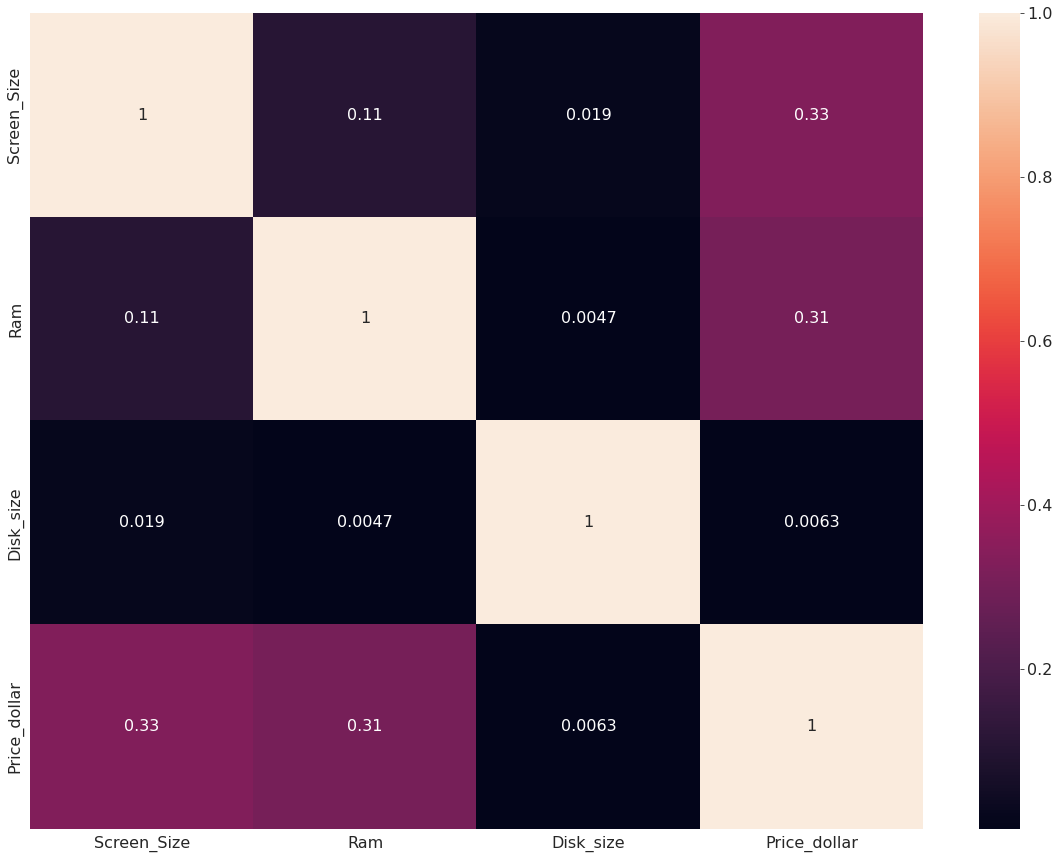

In [ ]:
sns.color_palette("flare", as_cmap=True)
corr = df_cleaned.corr()
print(corr)
# Plot the heatmap
sns.heatmap(corr, annot=True)

# Show the plot
plt.show()

This correlation heatmap shows correlation between Screen Size, disk size and Ram with the Price in dollar. 
- It can be seen that the price has highest correlation of 0.33 with Screen size which indicates that laptops with greater screen size are more expensive
- Similarly, Ram has correlation of 0.31 with the Price. This indicates that expensive laptops have higher Ram.
- Disk Size however doesn't have much correlation with Price of laptop
The same correlation can be seen in form of bar plot below

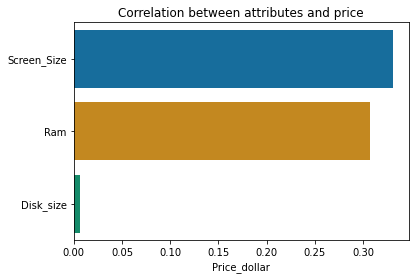

In [ ]:
corr = corr.Price_dollar;
cr = corr.sort_values(ascending=False)[1:];
sns.barplot(x=cr,y=cr.index,palette="colorblind");
plt.title("Correlation between attributes and price");

### Distribution of Laptops by brands in dataset

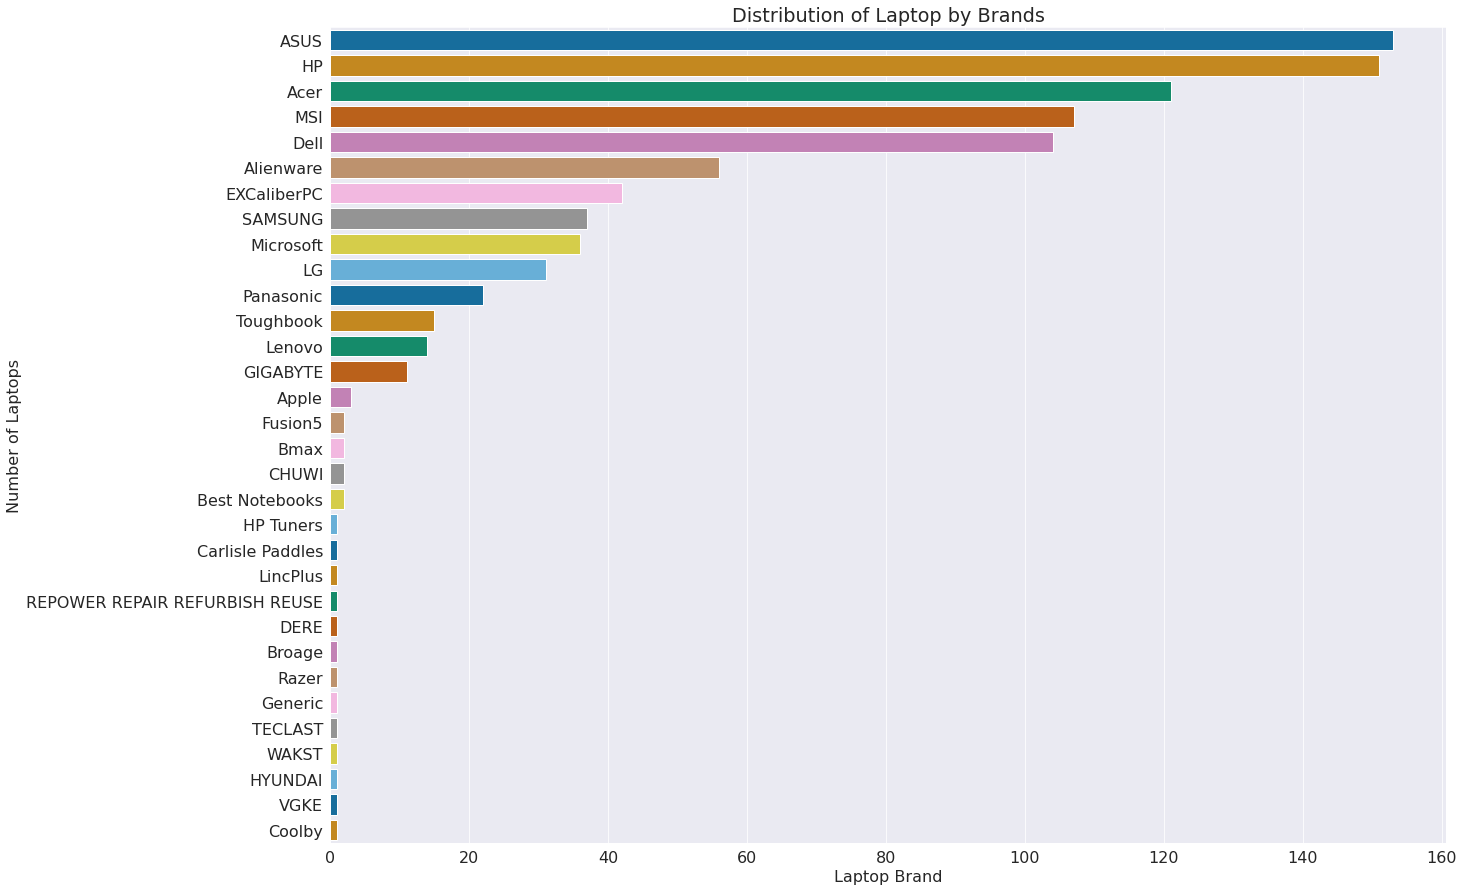

In [ ]:
brand_values = df_cleaned.Brand.value_counts()
sns.barplot(y=brand_values.index,x=brand_values.values,palette='colorblind')
plt.xlabel("Laptop Brand")
plt.ylabel("Number of Laptops")
plt.title("Distribution of Laptop by Brands")
plt.show()

This plot signifies that the top 5 most available laptop brands are Asus, HP, Acer, MSI, Dell

### Top 10 Expensive and Cheapest Laptops

In [ ]:
def first_five_words(sentence):
    words = sentence.split()
    words_5 = words[:5]
    new_sentence = []
    for i, word in enumerate(words_5):
        if (i + 1) % 1 == 0:
            new_sentence.append(word + '\n')
        else:
            new_sentence.append(word)
    return ' '.join(new_sentence)

Finding the most expensive laptops

In [ ]:
df_cleaned[['Title','Price_dollar']].sort_values(by="Price_dollar",ascending=False)[:10]

,Title,Price_dollar
481,Dell Alienware X17 R1 Gaming Laptop (2021) | 1...,6599.00
327,EXCaliberPC 2023 MSI Titan GT77HX 13VH-046US P...,6089.00
65,2022 MSI CreatorPro X17 A12UKS-059 (i9-12900HX...,5199.00
11,2022 MSI Creator Z17 A12UHT-048 Pro Extreme (i...,5195.00
275,PANASONIC TOUGHBOOK/CF-31/core i7/Intel Core i...,4999.99
446,"Dell Alienware Area 51M Gaming Laptop 17.3"" 1T...",4999.95
427,"Dell Alienware Area 51M Laptop, 17.3"" FHD (192...",4999.81
431,"Dell Alienware Area 51M Laptop, 17.3"" FHD (192...",4999.00
71,"MSI GE75 Raider 10SGS-222 17.3"" 300Hz 3ms Gami...",4999.00
133,"2022 MSI Raider GE67HX 12UHS-069 (i9-12900HX, ...",4945.00


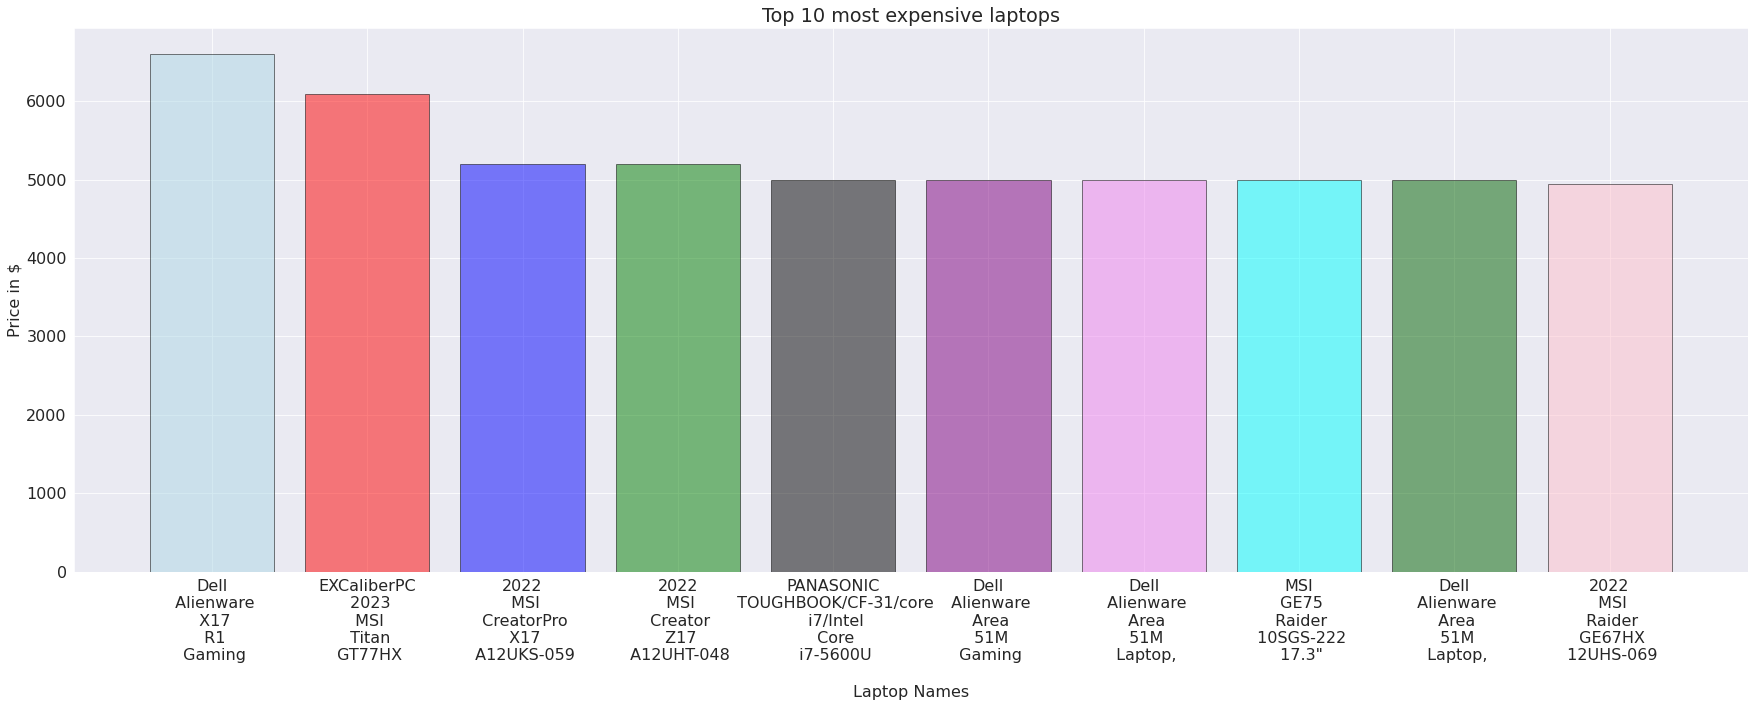

In [ ]:
top10 = df_cleaned.nlargest(10,'Price_dollar')
max_list=[]
for title_name in top10['Title']:
    max_list.append(first_five_words(title_name))
# print(max_list)
fig, ax = plt.subplots()
ax.set_xticks(range(10))
ax.set_xticklabels(max_list)
ax = plt.bar(top10['Title'], top10['Price_dollar'],color=['lightblue','red','blue','green','black','purple','violet','cyan','darkgreen','pink'],alpha=0.5,edgecolor='black')
fig.set_size_inches(30, 10)
plt.xlabel("Laptop Names")
plt.ylabel("Price in $")
plt.title("Top 10 most expensive laptops")
plt.show()
# print(top10['Title'])

The above plot shows top 10 most expensive laptops in our dataset. It can be seen that the Dell Alienware X17 R1 Gaming laptop is the most expensive laptop which costs $6599

Finding the most cheapest laptops

In [ ]:
df_cleaned[['Title','Price_dollar']].sort_values(by="Price_dollar",ascending=True)[:10]

,Title,Price_dollar
779,"Samsung Chromebook (Wi-Fi, 11.6-Inch) 2012 Model",38.98
644,SAMSUNG XE500C13-K03US Chromebook 3 - 11.6 HD ...,45.99
614,"Samsung Chromebook 3, 11.6"", 4GB RAM, 16GB eMM...",46.98
770,"SAMSUNG 11.6"" Chromebook with Intel N3060 up t...",49.95
794,Samsung Chromebook 3 XE500C13-K01US 2 GB RAM 1...,49.99
806,REPOWER REPAIR REFURBISH REUSE Samsung Chromeb...,54.98
762,"Samsung Chromebook 3 XE501C13-K02US, Intel Dua...",67.98
765,"SAMSUNG Chromebook 3 XE501C13-K01US, Intel Dua...",69.90
665,"ASUS Chromebook 11.6"" CX22NA-BCLN4",69.99
764,"SAMSUNG New 11.6"" Chromebook 3 Intel Atom x5 E...",72.88


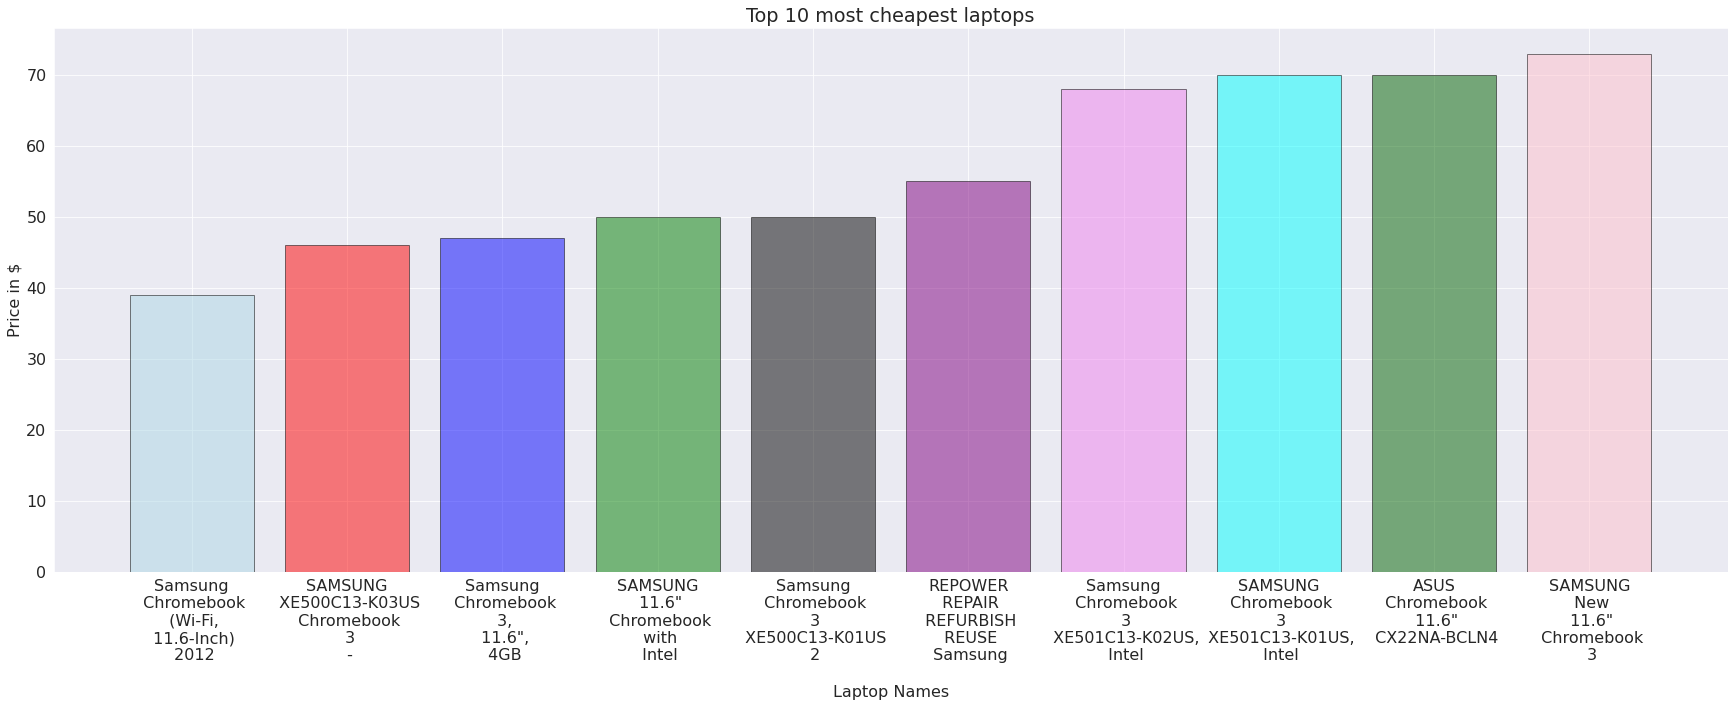

In [ ]:
top10 = df_cleaned.nsmallest(10,'Price_dollar')
max_list=[]
for title_name in top10['Title']:
    max_list.append(first_five_words(title_name))
# print(max_list)
fig, ax = plt.subplots()
ax.set_xticks(range(10))
ax.set_xticklabels(max_list)
ax = plt.bar(top10['Title'], top10['Price_dollar'],color=['lightblue','red','blue','green','black','purple','violet','cyan','darkgreen','pink'],alpha=0.5,edgecolor='black')
fig.set_size_inches(30, 10)
plt.xlabel("Laptop Names")
plt.ylabel("Price in $")
plt.title("Top 10 most cheapest laptops")
plt.show()
# print(top10['Title'])

This plot shows that Samsung Chromebook(Wi-Fi 11.6-inch) 2012 is the cheapest laptop in our dataset and it costs about $38.98

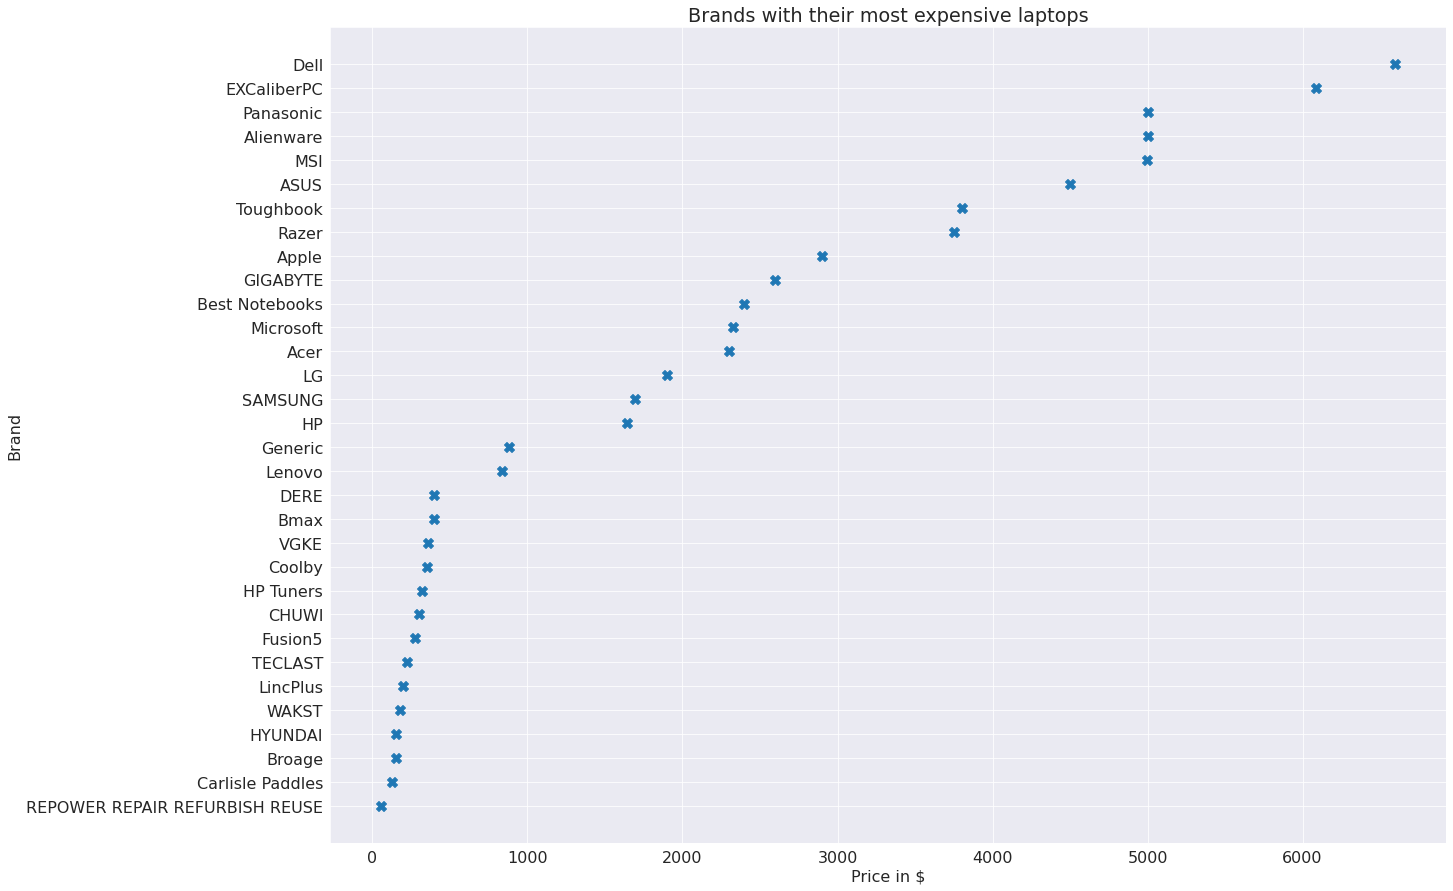

In [ ]:
grouped = df_cleaned.groupby('Brand')
result = grouped['Price_dollar'].max()
result = result.sort_values(ascending=True)
# print(result)
# set figsize
# sns.scatterplot(y=result.index,x=result.values,palette="colorblind")
sc = plt.scatter(x=result.values,y=result.index, s=100,marker="X")

plt.xlabel("Price in $")
plt.ylabel("Brand")
plt.title("Brands with their most expensive laptops")

plt.show()

This plot shows the rank of most expensive laptops of each brand. It also signifies that Dell brand has the most expensive laptop that costs above 6000 $. 

In [ ]:
grouped = df_cleaned.groupby('Brand')
result = grouped['Price_dollar'].mean()
result = result.sort_values(ascending=False)[:10]
print(result)
# set figsize
# plt.figure(figsize=(15,10))
sns.barplot(x=result.index,y=result.values,palette="colorblind")
plt.xlabel("Brand")
plt.ylabel("Price in $")
plt.title("Top 10 most expensive brands based on their average laptop price")
plt.show()

NameError: ignored

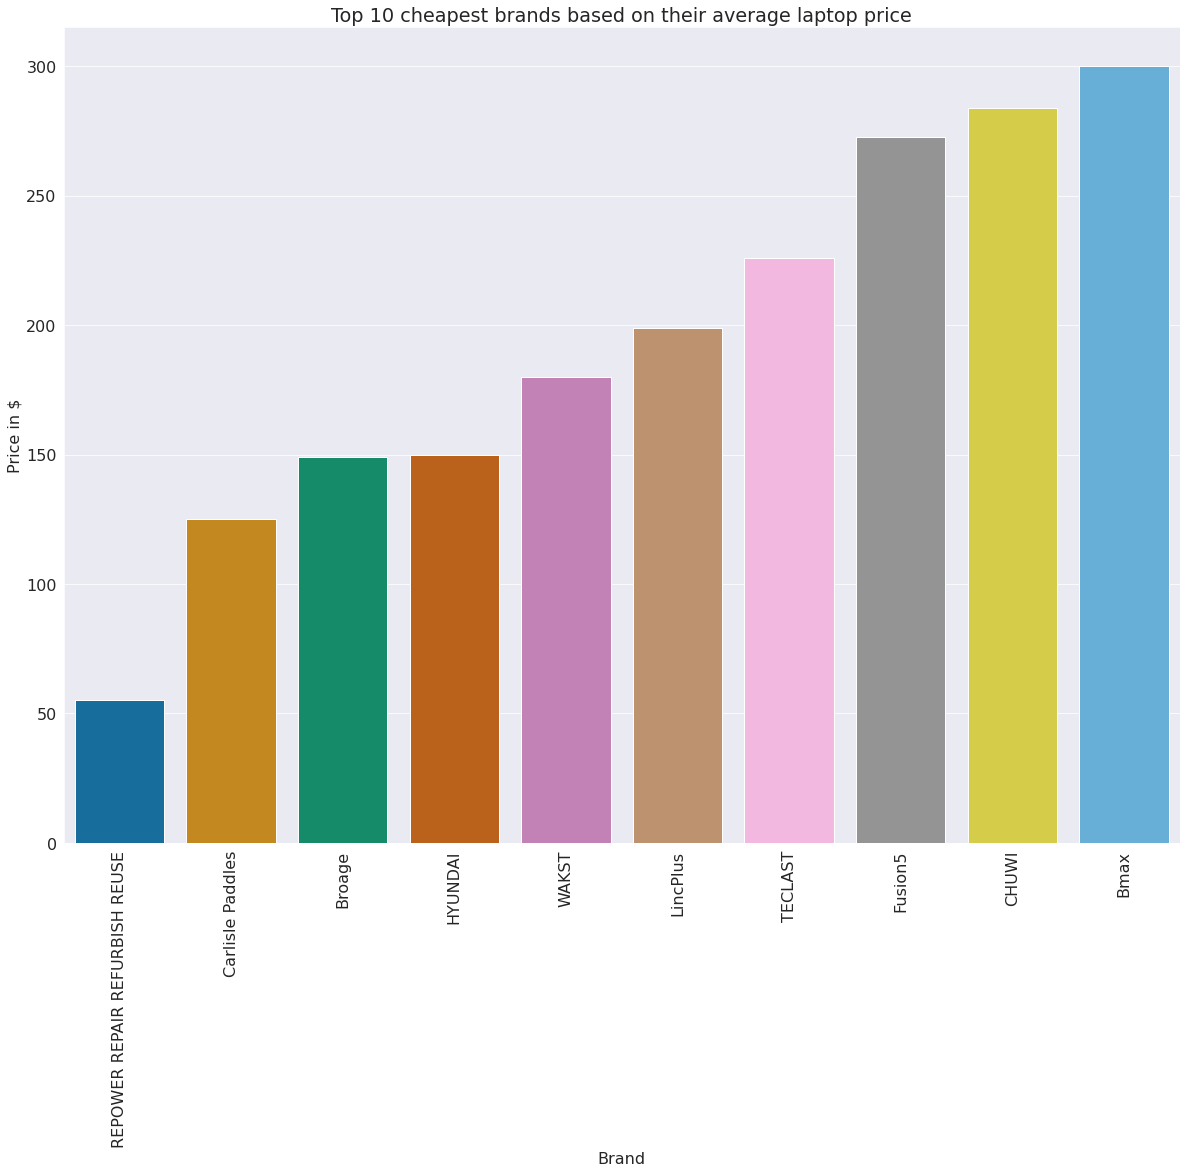

In [ ]:
grouped = df_cleaned.groupby('Brand')
result = grouped['Price_dollar'].mean()
result = result.sort_values(ascending=True)[:10]
# print(result)
# set figsize
# plt.figure(figsize=(15,10))
sns.barplot(x=result.index,y=result.values,palette="colorblind")
plt.xlabel("Brand")
plt.ylabel("Price in $")
plt.xticks(rotation="vertical")
plt.title("Top 10 cheapest brands based on their average laptop price")
plt.show()

**Bar Plot based on average laptop price in each brand**

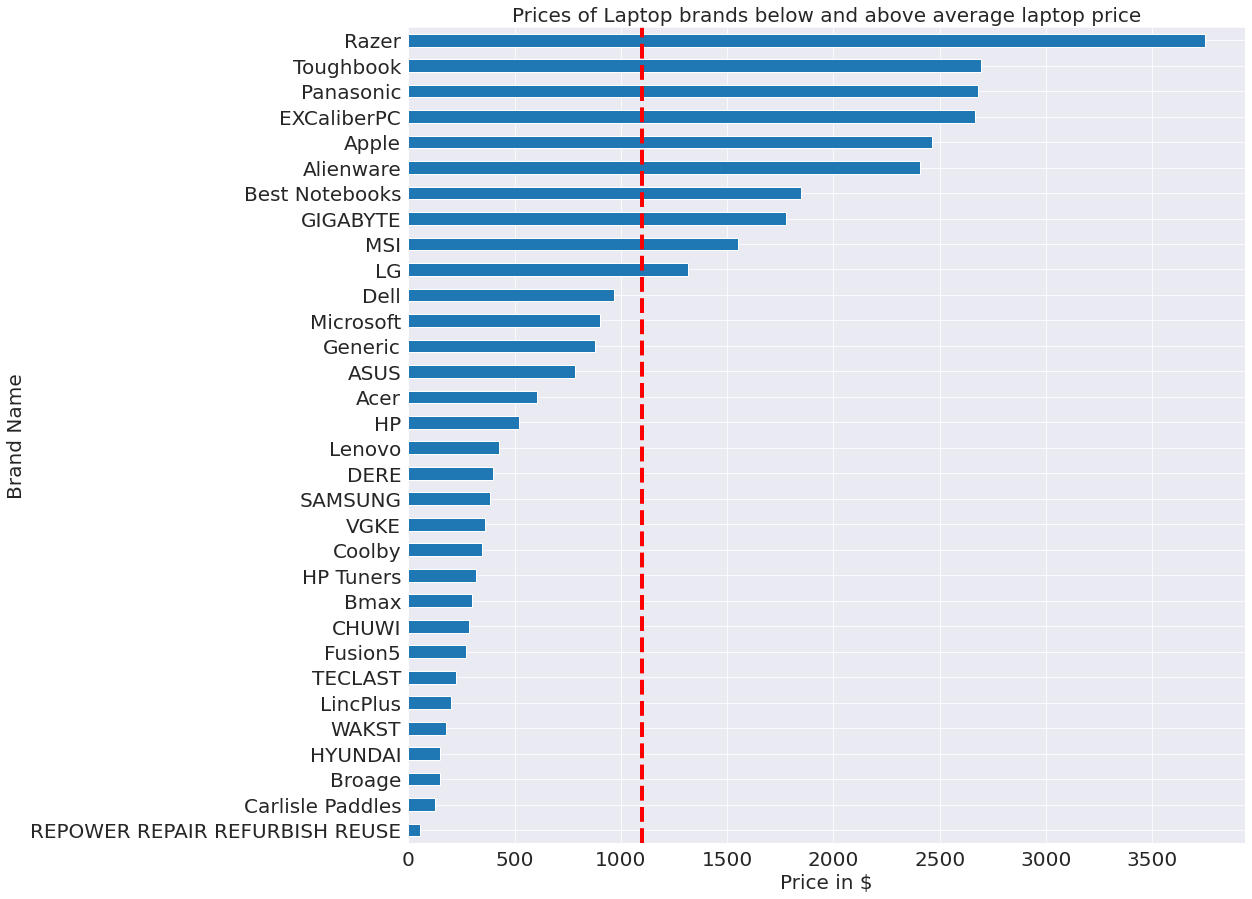

In [ ]:
df_cleaned[['Brand','Price_dollar']].groupby('Brand').mean().sort_values(by='Price_dollar', ascending = True).plot(kind = 'barh', grid = True, figsize = (15,15), 
        fontsize = 20, rot =0, legend = None)
plt.axvline(df_cleaned['Price_dollar'].mean(), color='r', linestyle='dashed', linewidth=4,label='the mean')
plt.xlabel('Price in $', fontsize = 20)
plt.ylabel('Brand Name', fontsize = 20)
plt.title("Prices of Laptop brands below and above average laptop price", fontsize = 20)
plt.show()

This plot shows that the average laptop price of all laptops in dataset is around $1200. It also shows the laptop brands whose price is greater than this average price and those laptop brands whose price is less than this average price

**Scatter Plot for Brands and Price**

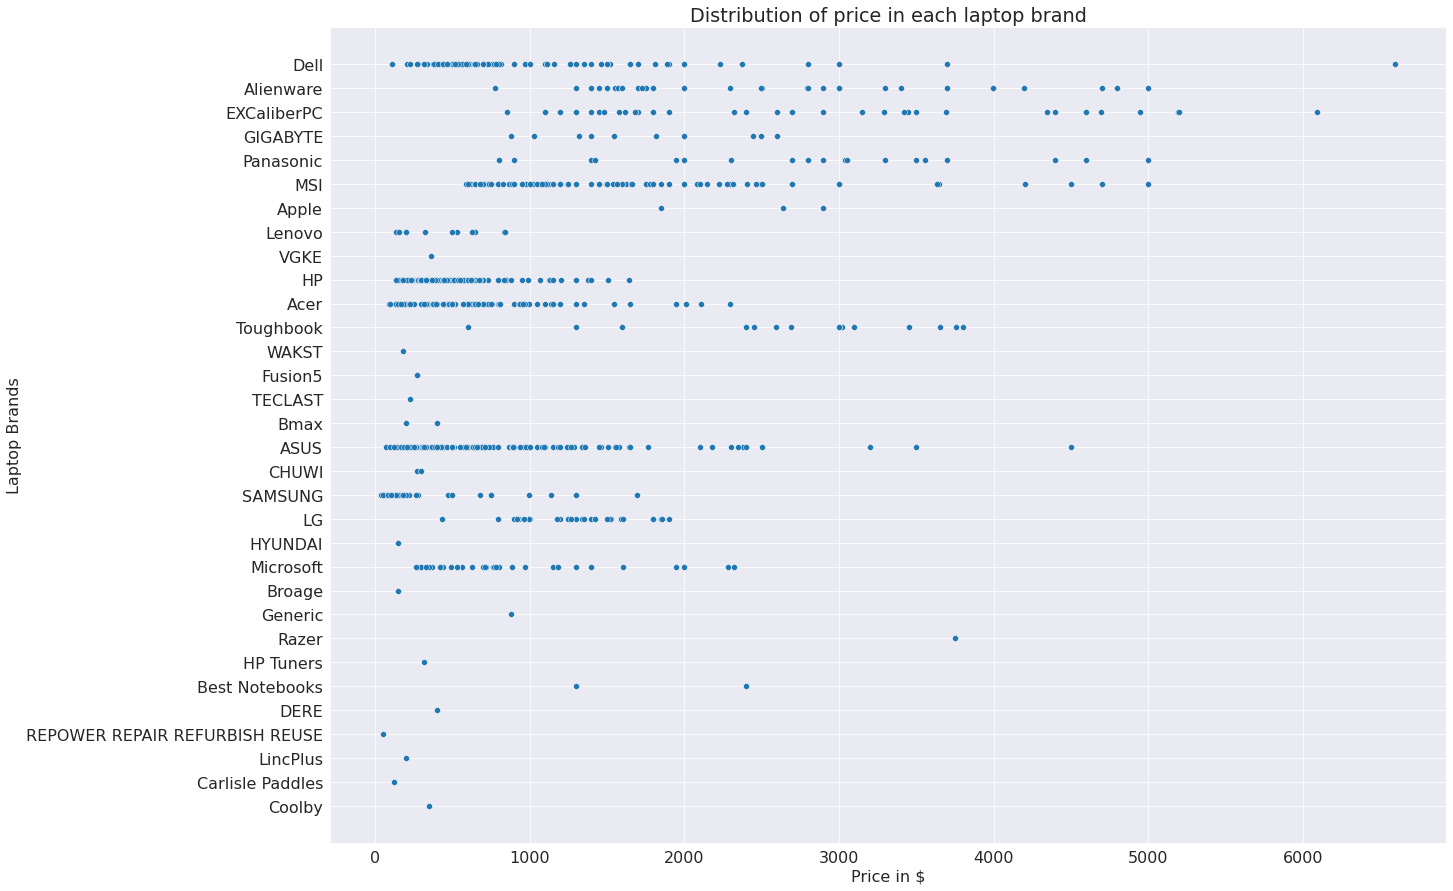

In [ ]:
sns.scatterplot(y=df_cleaned["Brand"],x=df_cleaned["Price_dollar"],palette="colorblind")
plt.xlabel("Price in $")
plt.ylabel("Laptop Brands")
plt.title("Distribution of price in each laptop brand")
plt.show()

### Top 10 Highest Rated Laptops

In [ ]:
df_cleaned = pd.read_csv(dataset_path)
print(f"Cleaned data has shape: {df_cleaned.shape}")
df_cleaned.head()

Cleaned data has shape: (924, 10)


,Title,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price_dollar,Price_npr
0,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6,Intel Core i5-1135G7,16.0,4.3,Intel UHD Graphics,256.0,818.00,108556.7800
1,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,17.3,Core i7 8750H,16.0,5.0,NVIDIA GeForce GTX 1070,1024.0,1799.95,238871.3645
2,EXCaliberPC 2022 MSI Pulse GL76 12UGK-256 (i7-...,EXCaliberPC,17.3,Intel Core i7,16.0,4.1,NVIDIA GeForce RTX 3070,512.0,1699.00,225474.2900
3,EXCaliberPC 2022 MSI Raider GE76 12UH-655 Pro ...,EXCaliberPC,17.3,Intel Core i9,64.0,5.0,NVIDIA GeForce RTX 3080,3072.0,4345.00,576624.9500
4,EXCaliberPC 2022 ASUS ROG Strix Scar 15 G533ZM...,EXCaliberPC,15.6,Intel Core i9,16.0,5.0,NVIDIA GeForce RTX 3060,512.0,1799.00,238745.2900


In [ ]:
df_cleaned[['Title','Rating']].sort_values(by="Rating",ascending=False)[:10]

,Title,Rating
462,Alienware 15R3 Intel Core i7-7700HQ X4 2.8GHz ...,5.0
194,"Acer Aspire 7 Gaming Laptop, 15.6"" Full HD IPS...",5.0
158,"Acer 2022 Newest Aspire 3 Laptop, 17.3 inch HD...",5.0
161,"Acer 2022 Aspire 5 Laptop: Core i7-1255U, 16GB...",5.0
163,"Acer 2022 Aspire 5 14"" FHD IPS Thin & Light La...",5.0
754,"Dell Inspiron 15.6"" Laptop, AMD Ryzen 5 Proces...",5.0
183,Acer Chromebook 311 MT8183/2.0GHz 4096/32 WNIC...,5.0
185,"Acer Aspire 5 Slim Laptop, 15.6"" Full HD IPS D...",5.0
721,Dell Vostro 14 Business Laptop: Core i5-1135G7...,5.0
717,Newest Dell Inspiron 3511 Premium Laptop (2022...,5.0


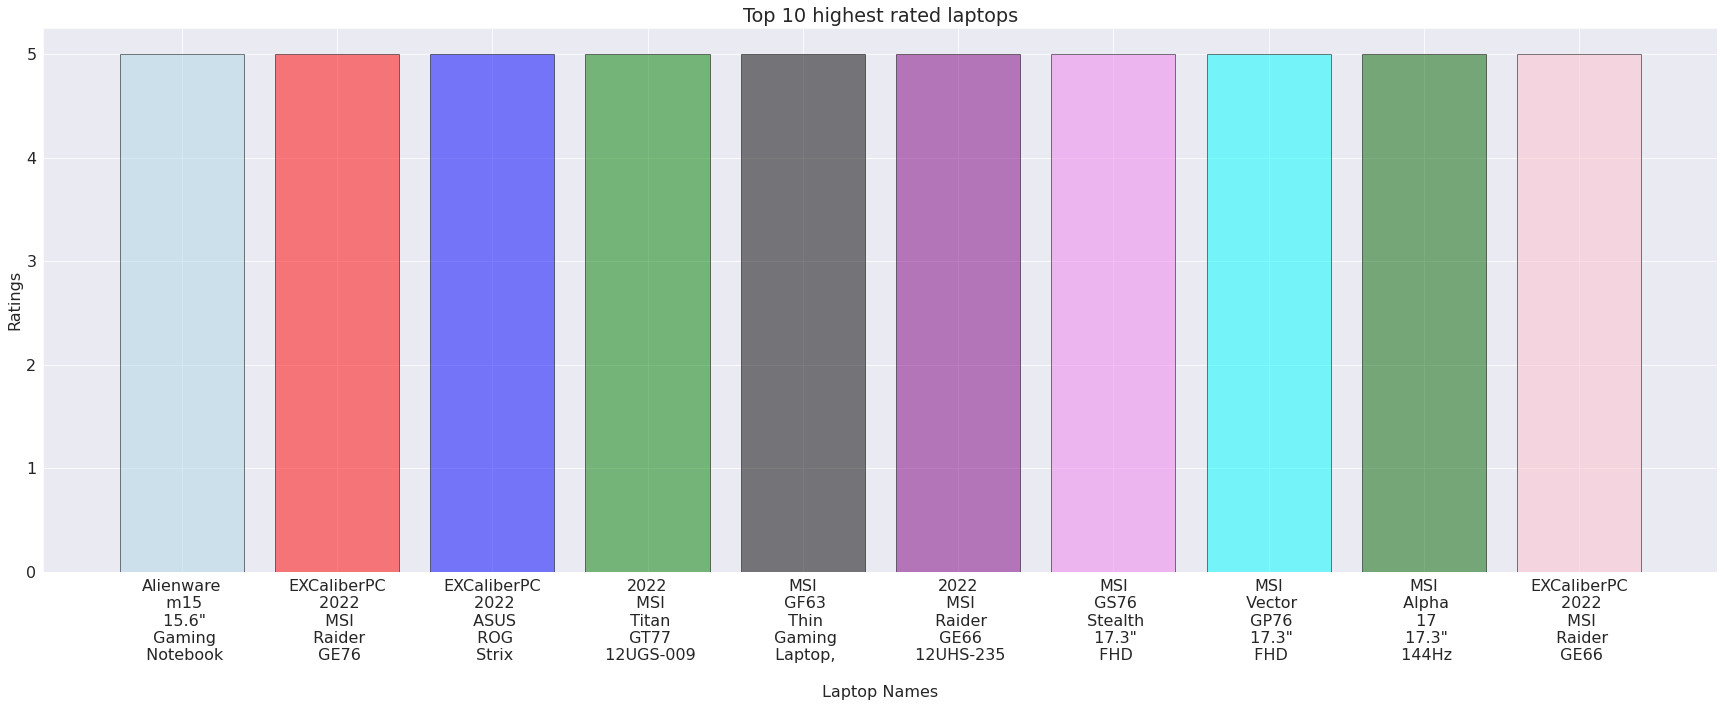

In [ ]:
top10 = df_cleaned.nlargest(10,'Rating')
max_list=[]
for title_name in top10['Title']:
    max_list.append(first_five_words(title_name))
# print(max_list)
fig, ax = plt.subplots()
ax.set_xticks(range(10))
ax.set_xticklabels(max_list)
ax = plt.bar(top10['Title'], top10['Rating'],color=['lightblue','red','blue','green','black','purple','violet','cyan','darkgreen','pink'],alpha=0.5,edgecolor='black')
fig.set_size_inches(30, 10)
plt.xlabel("Laptop Names")
plt.ylabel("Ratings")
plt.title("Top 10 highest rated laptops")
plt.show()
# print(top10['Title'])

### Visualization of distribution of ratings

In [ ]:
rating_counts = df_cleaned.Rating.value_counts().sort_index(ascending=False)
# rating_counts

In [ ]:
rating_dict = {
    "5": rating_counts[rating_counts.index == 5].sum(),
    "4 to 5":  rating_counts[(rating_counts.index < 5) & (rating_counts.index >= 4)].sum(),
    "3 to 4":  rating_counts[(rating_counts.index < 4) & (rating_counts.index >= 3)].sum(),
    "2 to 3":  rating_counts[(rating_counts.index < 3) & (rating_counts.index >= 2)].sum(),
    "1 to 2":  rating_counts[(rating_counts.index < 2) & (rating_counts.index >= 1)].sum(),
    "0 to 1":  rating_counts[(rating_counts.index < 1) & (rating_counts.index >= 0)].sum()
}
rating_dict

{'5': 104,
 '4 to 5': 553,
 '3 to 4': 109,
 '2 to 3': 12,
 '1 to 2': 2,
 '0 to 1': 144}

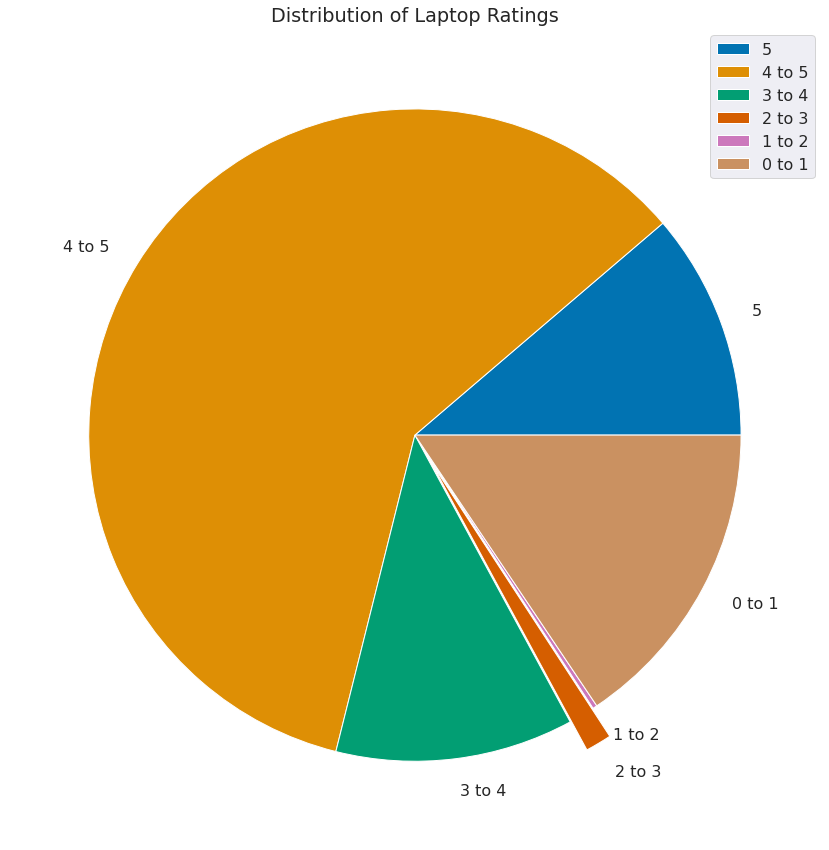

In [ ]:
# define Seaborn color palette to use
palette_color = sns.color_palette('colorblind')
# plotting data on chart
explode = [0,0,0,0.1,0,0]
plt.pie(rating_dict.values(), labels=rating_dict.keys(), colors=palette_color,explode=explode)
plt.title("Distribution of Laptop Ratings")
plt.legend()
plt.show()

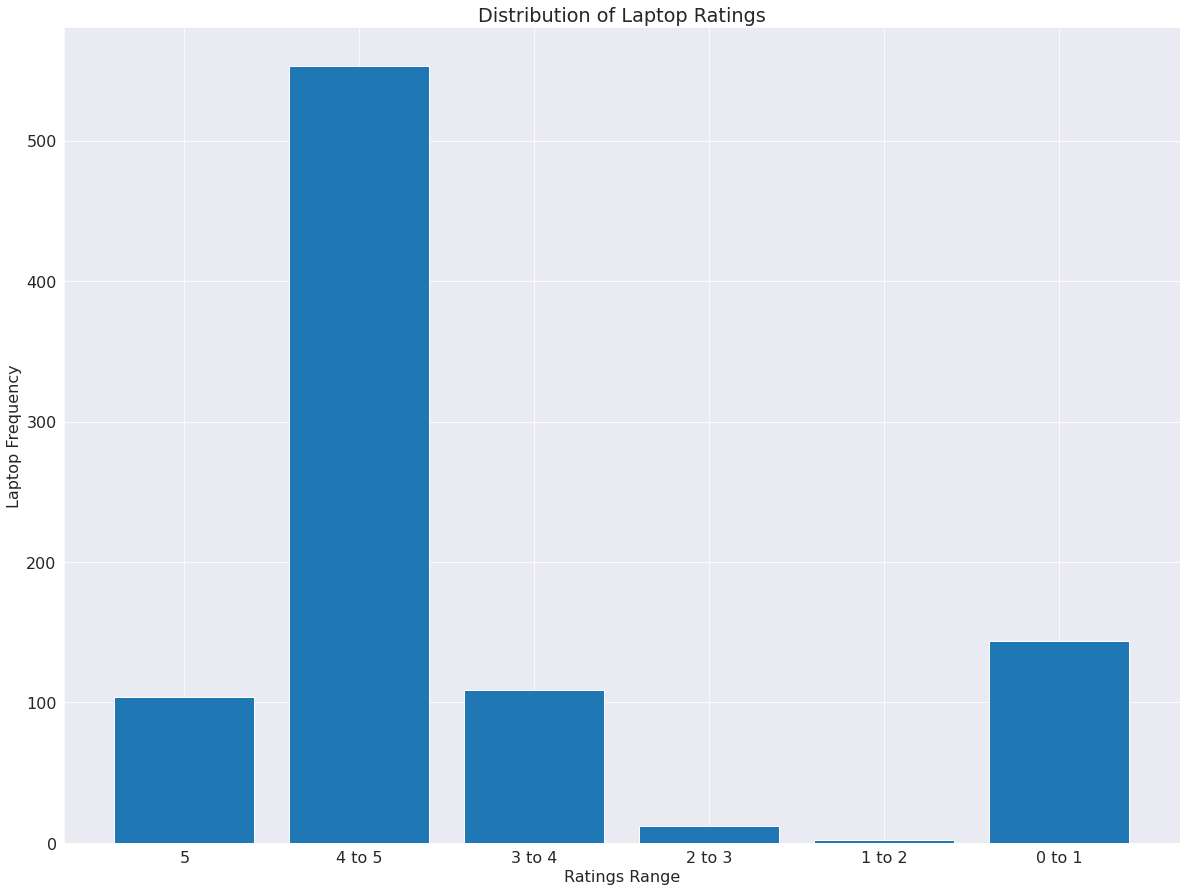

In [ ]:
names = list(rating_dict.keys())
values = list(rating_dict.values())

plt.bar(range(len(rating_dict)), values, tick_label=names)
plt.xlabel("Ratings Range")
plt.ylabel("Laptop Frequency")
plt.title("Distribution of Laptop Ratings")
plt.show()

From these above two plots we can see the distribution of laptops based on their ratings, it can be seen that most of the laptops are rated between values 4 and 5.

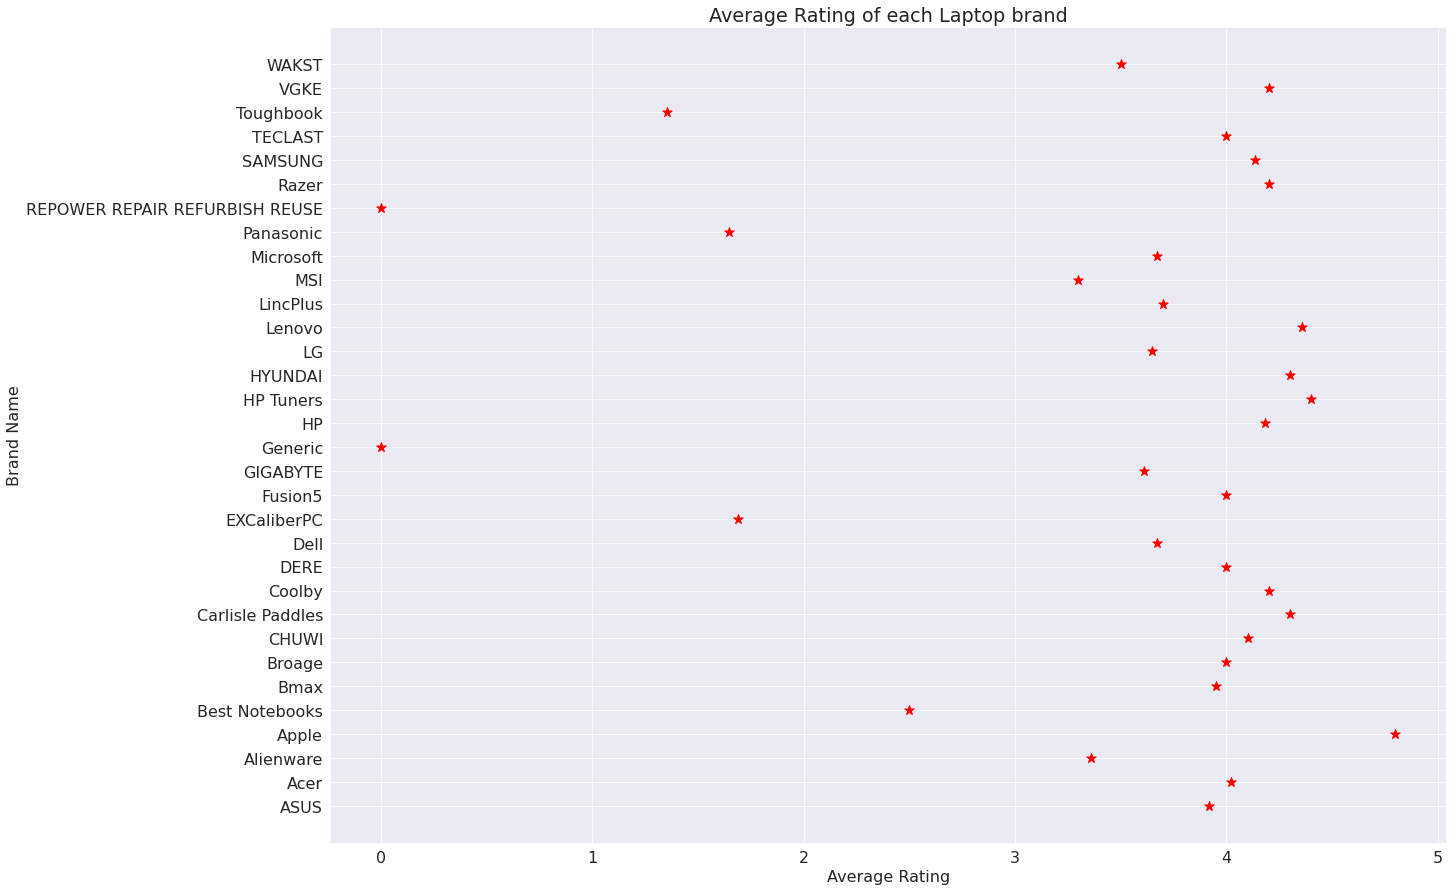

In [ ]:
grouped_brands = df_cleaned.groupby("Brand").mean()
# sns.scatterplot(y=grouped_brands.index,x=grouped_brands.Rating,color="r")
plt.scatter(x=grouped_brands.Rating,y=grouped_brands.index, s=100,marker="*",color="r")
plt.xlabel("Average Rating")
plt.ylabel("Brand Name")
plt.title("Average Rating of each Laptop brand")
plt.show()

From this plot, it can be seen that Apple has the highest average rating among all the brands. Also, the generic and repower-repair-refurbished-reused laptops are unrated laptop brands

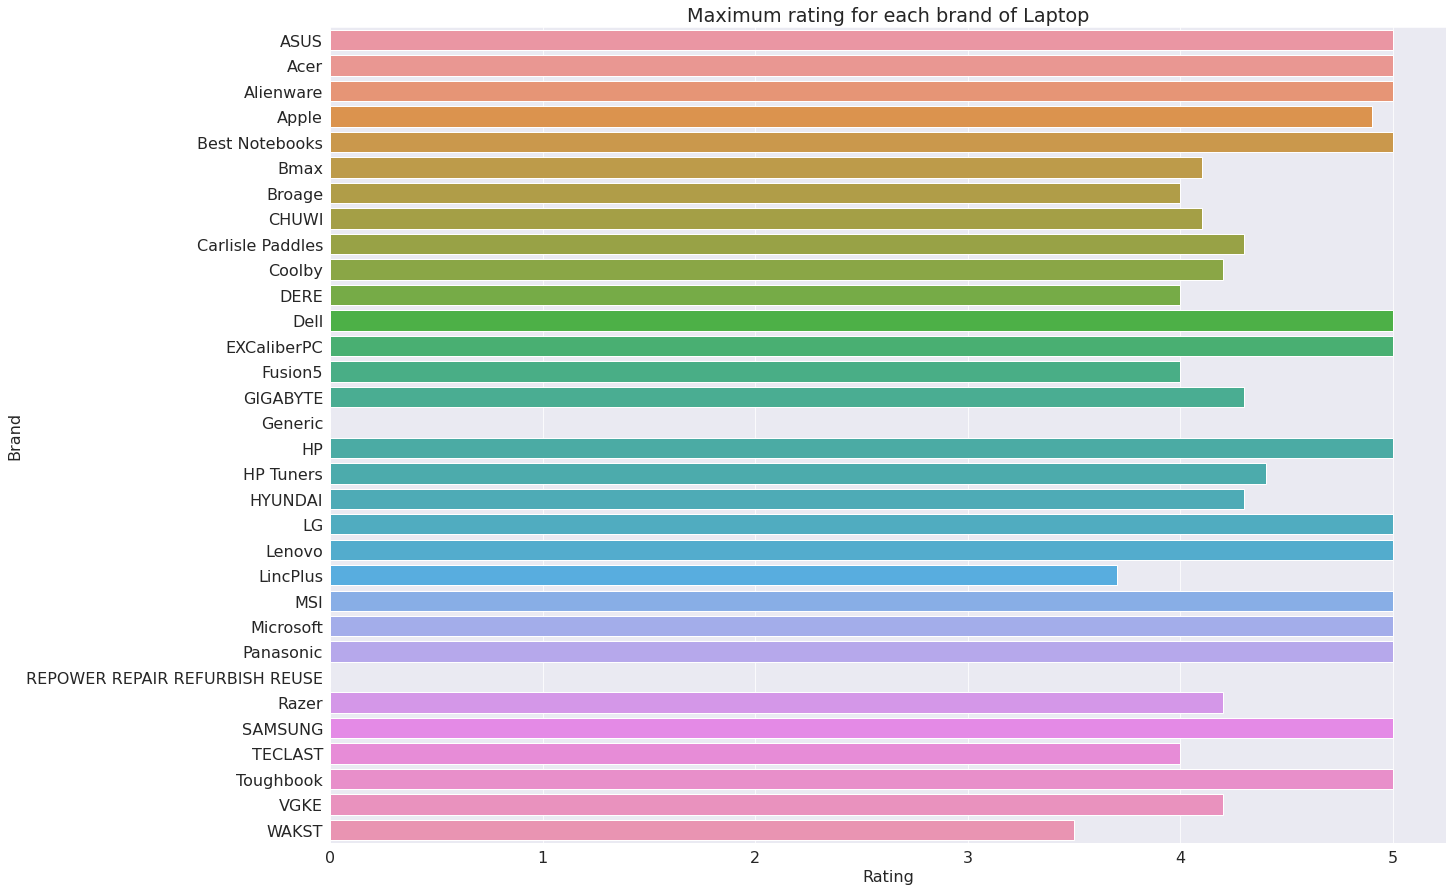

In [ ]:
grouped_brands = df_cleaned.groupby("Brand").max()
sns.barplot(y=grouped_brands.index,x=grouped_brands.Rating, orient='h')
plt.title("Maximum rating for each brand of Laptop")
plt.show()

The above two plots show the average rating of each laptop brand and maximum rating for each laptop brand. Here from max rating plot we can see that laptops of different brands have recieved max rating of 5. Also, some unrated laptop brands are also present in dataset

## CPU Models in each Brand

In [ ]:
import plotly.express as px
fig = px.sunburst(df_cleaned, path=['Brand', 'CPU_Model'], values='Price_dollar',color='Brand',title="CPU Models in each Brand")
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

## Ram vs Price 

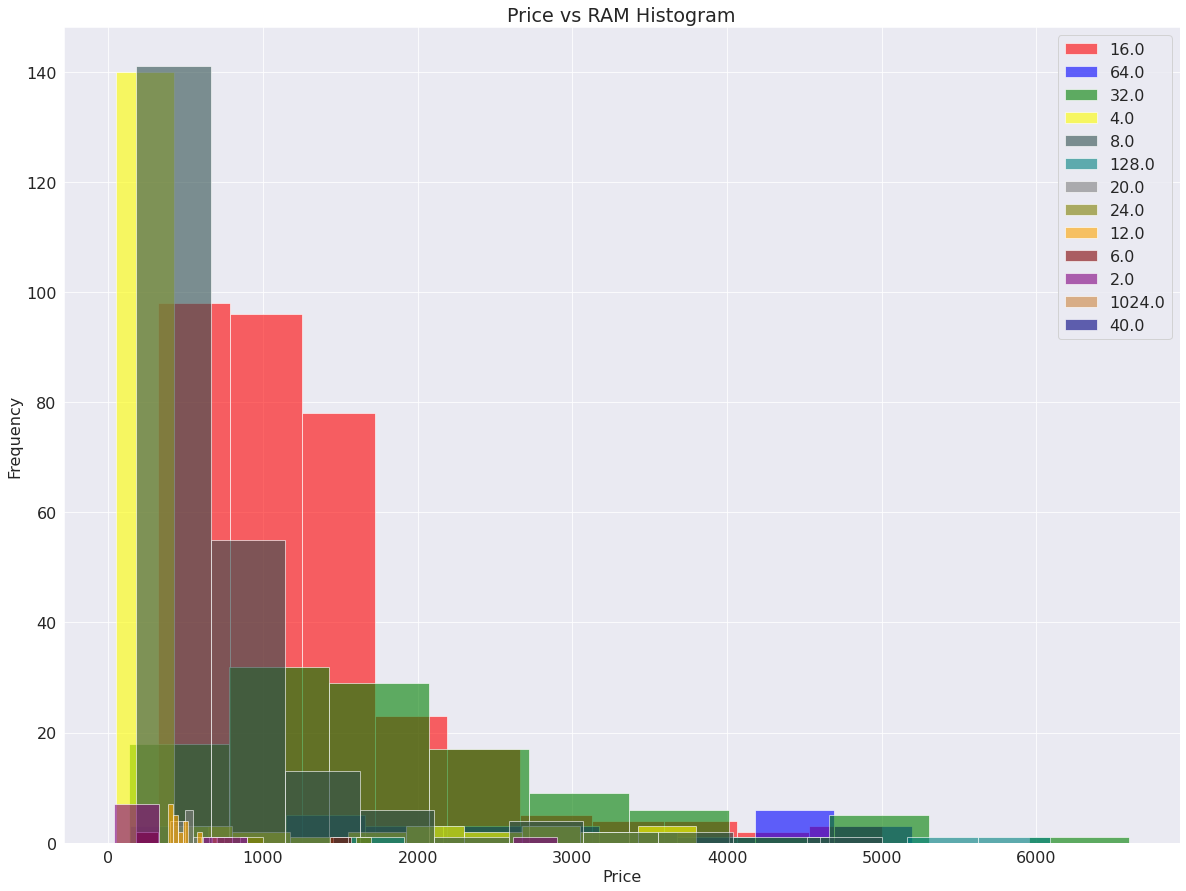

In [ ]:
unique_rams = df_cleaned['Ram'].unique()
colors = ['red', 'blue', 'green', 'yellow', 'darkslategrey','teal','gray','olive','orange','maroon','purple','peru','navy']

for i, ram in enumerate(unique_rams):
    subset = df_cleaned[df_cleaned['Ram'] == ram]
    plt.hist(subset['Price_dollar'], alpha=0.6, color=colors[i % len(colors)], label=str(ram))

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price vs RAM Histogram')
plt.legend()
plt.show()

The above plot shows that the most commonly used RAMS are 4GB, 8GB and 16GB RAMS